In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn as sns
x = np.linspace(-4, 4, 100)
tencent_blue = (0,0.3215686274509804,0.8509803921568627)
tencent_orange = (0.9333333333333333, 0.49411764705882355, 0.2784313725490196)


# Calculate y-values for the standard normal density curve
y_standard_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

In [73]:
import glob
result_pd = pd.DataFrame()
for f in glob.glob("results/small_ebd*"):
    df = pd.read_csv(f)
    result_pd = pd.concat([result_pd, df])
print(len(result_pd))

200


In [74]:
# result_pd_minus = pd.read_csv("PaperResult/sim_result_uplift_minus05.csv")
# result_pd_plus = pd.read_csv("PaperResult/sim_result_uplift_plus05.csv")
# print(len(result_pd_minus), len(result_pd_plus))

In [75]:
result_pd.head()

,Unnamed: 0,debias_point,debias_var,dim,dim_var,undebias_point,undebias_var,J,Q,K,M,epochs,n_folds,uplift_factor,truth,truth_stderr
0,0,0.026987,0.252974,0.103055,1.543547,0.024856,0.002518,500,1000,3,500,500,3,1.0,0.017311,0.012860
0,0,0.022956,0.198105,0.085335,1.660426,0.014241,0.002992,500,1000,3,500,500,3,1.0,0.016812,0.012381
0,0,0.009706,0.208201,0.125095,1.684244,-0.000030,0.001583,500,1000,3,500,500,3,1.0,0.017807,0.012039
0,0,0.004697,0.212050,0.141380,1.659713,-0.003249,0.001939,500,1000,3,500,500,3,1.0,0.015100,0.012453
0,0,0.022960,0.220777,0.134112,1.602876,0.021726,0.002483,500,1000,3,500,500,3,1.0,0.015375,0.012174


In [76]:
def print_statistics(name_est, name_var, df):
    bias = np.mean(df[name_est]-df['truth'].mean()) 
    mc_std = np.std(df[name_est]-df['truth'].mean())
    estimate_std = np.mean(np.sqrt(df[name_var]/(df['Q'].to_numpy()[0])))
    print(f"Estimator {name_est}, bias {bias}, mc std {mc_std}, estimate std {estimate_std}")

In [77]:
def plot(df):
    print_statistics('debias_point', 'debias_var', df)
    print_statistics('undebias_point', 'undebias_var', df)
    print_statistics('dim', 'dim_var', df)

    truth =  df['truth'].mean()
    print(f"truth {truth}")
    debias_B_true = np.array(df['debias_point'])
    debias_var_B_true = np.array(df['debias_var'])
    dim_B =  np.array(df['dim'])
    dim_var_B =  np.array(df['dim_var'])
    undebias_B_true =  np.array(df['undebias_point'])
    undebias_var_B_true = np.array(df['undebias_var'])
    Q = df['Q'].values[0]
    
    n_folds = 3
    plt.figure() 
    sns.kdeplot((np.array(debias_B_true) - truth) /  np.sqrt(np.array(debias_var_B_true)/(int(Q))) , fill = True,color=tencent_blue,label = "Ours(DB)",alpha=0.1)
    # sns.kdeplot((np.array(undebias_B_true)- truth) /  np.sqrt(np.array(undebias_var_B_true)/(int(Q))) , fill = True,color='red',label = "Ours(DPI)",alpha=0.1)
    sns.kdeplot((np.array(dim_B) - truth) / np.sqrt(np.array(dim_var_B) / int(Q)), fill = True,color=tencent_orange,label = "DIM",alpha=0.1)
    plt.plot(x, y_standard_normal, color='black', label="Standard Normal", ls='--')
    plt.legend()
    # plt.savefig("AB_plot_11063000.png")

Estimator debias_point, bias 0.000221020108888329, mc std 0.01421233971726139, estimate std 0.014768333670133471
Estimator undebias_point, bias 0.00019961464028024907, mc std 0.009217077341225996, estimate std 0.0015708171955124835
Estimator dim, bias 0.09927889366268254, mc std 0.073993343679542, estimate std 0.03992731106748224
truth 0.01688187116758975


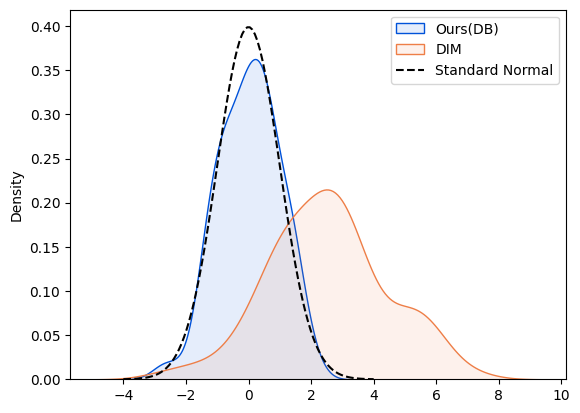

In [78]:
plot(result_pd.query("uplift_factor==1.0"))

Estimator debias_point, bias 0.0024589143231912684, mc std 0.015464166210010928, estimate std 0.015053153566628263
Estimator undebias_point, bias 0.004837310903933465, mc std 0.01131633285985663, estimate std 0.0016058356085011927
Estimator dim, bias -0.0977955759434777, mc std 0.06792408324277195, estimate std 0.03872208061183752
truth -0.017703812023373466


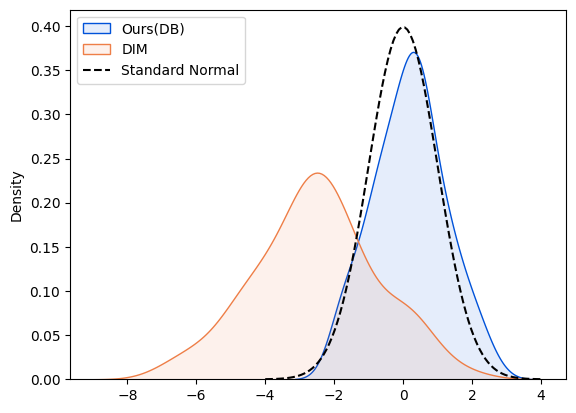

In [79]:
plot(result_pd.query("uplift_factor==-1.0"))

In [82]:
result_pd.query("uplift_factor==1.0").to_csv("PaperResult/new_results_uplift_factor_plusone.csv")

In [83]:
result_pd.query("uplift_factor==-1.0").to_csv("PaperResult/new_results_uplift_factor_minusone.csv")